Se importa libreria pandas para manejo de datos
Se pone el PATH del archivo
Se pone un encoding para el archivo

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Especifica la ruta del archivo .txt
ruta_archivo = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\Tarea 040324\\PARAMETROS_FINALES_CRUDOS.csv'
encoding = 'latin-1'

Se lee archivo de la ruta, con el encoding y la separacion por coma
Se imprime las primeras filas del DataFrame
Se imprime todos los nombres de los encabezados

In [22]:

# Lee el archivo .txt en un DataFrame de Pandas
dataframe = pd.read_csv(ruta_archivo,encoding= encoding, sep=',' )
# Muestra las primeras filas del DataFrame para verificar la carga de datos
print(dataframe.head())
print("Nombres de los datos->")
print(dataframe.iloc[:0, ])


   CLOROF_A  COLI_FEC  COLI_TOT   E_COLI     COT  COT_SOL  DBO_SOL  DBO_TOT  \
0       NaN   24196.0   24196.0      NaN  2.3560   2.3500     3.33     6.63   
1       NaN   24196.0   24196.0  24196.0  8.3441   6.4727     2.73     4.11   
2       NaN   24196.0   24196.0   3654.0  8.1953   6.1425     4.97     6.65   
3       NaN   24196.0   24196.0    776.0  7.6502   4.0415     2.00     2.34   
4       NaN     663.0   12997.0    109.0  9.4452   3.0909     2.00     2.33   

   DQO_SOL  DQO_TOT  ...  TEMP_AMB  PROFUNDIDAD    CAUDAL   DUR_TOT  \
0     12.6  18.0872  ...      35.3          NaN     430.0  303.3400   
1     15.5  27.8784  ...      26.7          NaN  420000.0  222.9984   
2     10.0  16.1600  ...      34.6          NaN     180.0  224.4432   
3     10.0  10.0000  ...       NaN          NaN       5.0  414.9600   
4     10.0  25.4700  ...      37.4          NaN       5.0  298.9900   

   TEMP_AGUA  CONDUC_CAMPO  pH_CAMPO   OD_%  OD_mg/L  \
0       24.6        1200.0      8.20   83.

Se seleccionan solo las columnas 

In [23]:
columnas_deseadas = ['OD_mg/L', 'CONDUC_CAMPO', 'TEMP_AGUA', 'pH_CAMPO']
nuevo_dataframe = dataframe[columnas_deseadas]
print(nuevo_dataframe.head())

print(nuevo_dataframe.info())

   OD_mg/L  CONDUC_CAMPO  TEMP_AGUA  pH_CAMPO
0     5.26        1200.0       24.6      8.20
1     7.21         677.0       24.3      7.97
2     7.31         479.0       25.8      8.02
3     7.07         930.0       29.9      8.05
4     9.06        1170.0       33.1      8.27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OD_mg/L       5912 non-null   float64
 1   CONDUC_CAMPO  6108 non-null   float64
 2   TEMP_AGUA     5941 non-null   float64
 3   pH_CAMPO      6067 non-null   float64
dtypes: float64(4)
memory usage: 192.7 KB
None


In [24]:
data = nuevo_dataframe.dropna()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5656 entries, 0 to 6161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OD_mg/L       5656 non-null   float64
 1   CONDUC_CAMPO  5656 non-null   float64
 2   TEMP_AGUA     5656 non-null   float64
 3   pH_CAMPO      5656 non-null   float64
dtypes: float64(4)
memory usage: 220.9 KB
None


In [25]:
data.describe()

,OD_mg/L,CONDUC_CAMPO,TEMP_AGUA,pH_CAMPO
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,7.180562,18293.398362,28.547056,8.113287
std,2.296085,27252.913203,3.622815,0.460694
min,1.000000,63.000000,16.300000,0.200000
25%,6.087500,230.000000,25.900000,7.820000
50%,7.310000,717.000000,29.100000,8.100000
75%,8.420000,45811.750000,31.400000,8.400000
max,21.660000,148300.000000,39.600000,10.000000


In [26]:
X = data.drop(['pH_CAMPO'], axis=1)
print(X.head())
print(X.shape)

   OD_mg/L  CONDUC_CAMPO  TEMP_AGUA
0     5.26        1200.0       24.6
1     7.21         677.0       24.3
2     7.31         479.0       25.8
3     7.07         930.0       29.9
4     9.06        1170.0       33.1
(5656, 3)


In [27]:
y = data['pH_CAMPO']
print(y.head())
print(y.shape)

0    8.20
1    7.97
2    8.02
3    8.05
4    8.27
Name: pH_CAMPO, dtype: float64
(5656,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3393, 3)
(3393,)
(2263, 3)
(2263,)


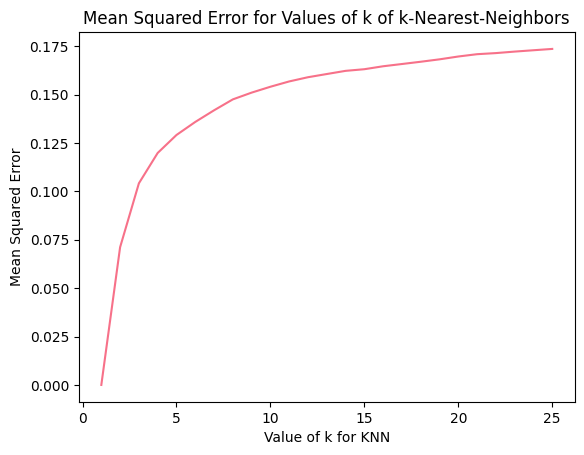

In [37]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    # Depending on your regression task, you might need a different evaluation metric
    # For example, mean squared error (MSE) could be used:
    mse = metrics.mean_squared_error(y, y_pred)
    scores.append(mse)

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Values of k of k-Nearest-Neighbors')
plt.show()

In [30]:

# Ahora, veamos también cómo se comporta una regresión lineal (Linear Regression)
logreg = LinearRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.mean_squared_error(y, y_pred))




0.1599258075985396


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3393, 3)
(3393,)
(2263, 3)
(2263,)


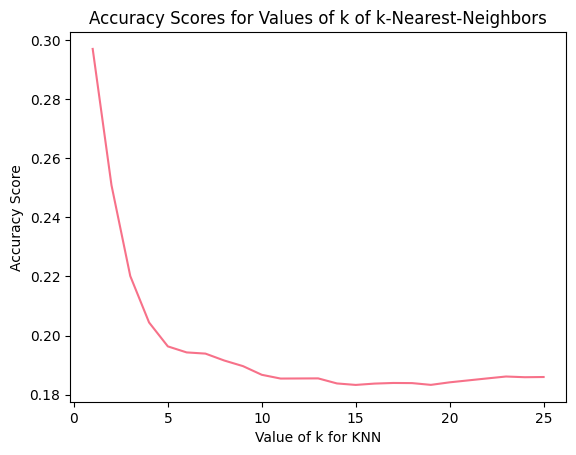

In [32]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    scores.append(mse)

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [33]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

0.150838006524703


In [34]:
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X, y)
data_predictX = X_test[0:1]
print(data_predictX)

      OD_mg/L  CONDUC_CAMPO  TEMP_AGUA
5578    11.27       42700.0       33.1


In [35]:
data_predictY = y_test[0:1]
print(data_predictY)

5578    8.4
Name: pH_CAMPO, dtype: float64


In [36]:
dato_predecir = [11.27,42700,33.1]
knn.predict([dato_predecir])

C:\Users\Waldosir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([8.33842105])